## Sentiment Analysis on Feedback 

In [1]:
#import Libraries
import pandas as pd
import re

In [2]:
# Read the excel file 
df=pd.read_excel(r'C:\\Users\\muska\\Downloads\\Data.xlsx')
df.head()

,Order Id,Order Status,Item Name,Item Quantity,Rating,Feedback
0,107098745382,CANCELLED,Set of Chapatis (4 - Chapatis),2.0,NaN,NaN
1,107098745382,CANCELLED,"2 Paneer Paratha, Curd & Pickle Meal",1.0,NaN,NaN
2,107098745382,CANCELLED,"2 Gobhi Paratha, Curd & Pickle Meal",1.0,NaN,NaN
3,107098745382,CANCELLED,Bhindi Masala,1.0,NaN,NaN
4,107022708087,DELIVERED,"Voosh Paneer Premium Thali with Sweet, Butter ...",1.0,NaN,NaN


In [3]:
df.shape

(6934, 6)

### cleaning of raw data 

In [4]:
# Remove rows containing cancelled order status
df=df.loc[df['Order Status']=='DELIVERED']
df.head()

,Order Id,Order Status,Item Name,Item Quantity,Rating,Feedback
4,107022708087,DELIVERED,"Voosh Paneer Premium Thali with Sweet, Butter ...",1.0,NaN,NaN
5,107021562317,DELIVERED,Voosh Paratha Platter with Butter Milk,1.0,NaN,NaN
6,107021299112,DELIVERED,Homely Chicken Masala Thali with Sweet,1.0,NaN,NaN
7,107020328220,DELIVERED,Homely Bhindi Masala Thali with Sweet,3.0,5 LOVED IT,NaN
8,107020098474,DELIVERED,Set of Chapatis (4 - Chapatis),1.0,NaN,NaN


In [5]:
df.shape

(6762, 6)

In [6]:
# Remove Blanks
df=df.dropna()

In [7]:
df.head()

,Order Id,Order Status,Item Name,Item Quantity,Rating,Feedback
18,10701530888,DELIVERED,Homely Dal Tadka Thali with Sweet,1.0,1 VERY BAD,I don't think it's delivery guy fault but pack...
19,10701530888,DELIVERED,Dal Tadka Rice Bowl with Butter Milk,1.0,1 VERY BAD,I don't think it's delivery guy fault but pack...
33,106989449753,DELIVERED,Homely Chicken Masala Thali with Sweet,1.0,5 LOVED IT,I liked the quantity of the food and the taste.
49,106762961007,DELIVERED,Homely Bhindi Masala Thali with Sweet,1.0,2 BAD,"Bhindi was very raw, butter milk had a foul smell"
50,106762961007,DELIVERED,Butter Milk(300 ml),1.0,2 BAD,"Bhindi was very raw, butter milk had a foul smell"


In [8]:
# Remove duplicates from the file
df=df.drop_duplicates()
df.shape

(231, 6)

In [9]:
# Remove duplicates in 'Order' column only
df=df.drop_duplicates(subset='Order Id')
df.head()

,Order Id,Order Status,Item Name,Item Quantity,Rating,Feedback
18,10701530888,DELIVERED,Homely Dal Tadka Thali with Sweet,1.0,1 VERY BAD,I don't think it's delivery guy fault but pack...
33,106989449753,DELIVERED,Homely Chicken Masala Thali with Sweet,1.0,5 LOVED IT,I liked the quantity of the food and the taste.
49,106762961007,DELIVERED,Homely Bhindi Masala Thali with Sweet,1.0,2 BAD,"Bhindi was very raw, butter milk had a foul smell"
75,106499865637,DELIVERED,Egg Masala,1.0,1 VERY BAD,One of the 3rd class restaurant. I ordered Egg...
107,106330086944,DELIVERED,"Chicken Masala Rice Bowl, Butter Milk",1.0,2 BAD,Chicken bowl had only two pieces of chicken


In [10]:
df.shape

(145, 6)

In [11]:
# lowering the case
df['Feedback']=df.Feedback.str.lower()
df.head(2)

,Order Id,Order Status,Item Name,Item Quantity,Rating,Feedback
18,10701530888,DELIVERED,Homely Dal Tadka Thali with Sweet,1.0,1 VERY BAD,i don't think it's delivery guy fault but pack...
33,106989449753,DELIVERED,Homely Chicken Masala Thali with Sweet,1.0,5 LOVED IT,i liked the quantity of the food and the taste.


## Tokenization 

In [12]:
#tokenization
import nltk
def tokenization(data):
    feedback = data['Feedback']
    tokens = nltk.word_tokenize(feedback)
    # taken only words (not punctuation)
    #token_words = [w for w in tokens if w.isalpha()]
    return tokens

df['Feedback'] = df.apply(tokenization, axis=1)

In [13]:
df.head()

,Order Id,Order Status,Item Name,Item Quantity,Rating,Feedback
18,10701530888,DELIVERED,Homely Dal Tadka Thali with Sweet,1.0,1 VERY BAD,"[i, do, n't, think, it, 's, delivery, guy, fau..."
33,106989449753,DELIVERED,Homely Chicken Masala Thali with Sweet,1.0,5 LOVED IT,"[i, liked, the, quantity, of, the, food, and, ..."
49,106762961007,DELIVERED,Homely Bhindi Masala Thali with Sweet,1.0,2 BAD,"[bhindi, was, very, raw, ,, butter, milk, had,..."
75,106499865637,DELIVERED,Egg Masala,1.0,1 VERY BAD,"[one, of, the, 3rd, class, restaurant, ., i, o..."
107,106330086944,DELIVERED,"Chicken Masala Rice Bowl, Butter Milk",1.0,2 BAD,"[chicken, bowl, had, only, two, pieces, of, ch..."


### Removing stopwords 

In [14]:
# Remove stopwords
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [15]:
#remove words that are in NLTK stopwords list
not_stopwords = ['not', 'no',"doesn't","don't",'more','same','very','most','should',"couldn't",'should',"shouldn't"] 
final_stop_words = set([word for word in stop_words if word not in not_stopwords])

In [16]:
# define function for removing stopwords
def tokens_without_sw(tokens):
    txt = [word for word in tokens if not word in final_stop_words]
    return txt

In [17]:
df['Feedback']= df['Feedback'].apply(lambda x: tokens_without_sw(x))

### Lemmatization 

In [18]:
# Lemmatization
import nltk
from nltk.stem import WordNetLemmatizer
wn = WordNetLemmatizer()
def lemmatizer(data):
    data = [wn.lemmatize(word,'v') for word in data]
    return data
df['Feedback']= df['Feedback'].apply(lambda x: lemmatizer(x))

In [19]:
df.head()

,Order Id,Order Status,Item Name,Item Quantity,Rating,Feedback
18,10701530888,DELIVERED,Homely Dal Tadka Thali with Sweet,1.0,1 VERY BAD,"[n't, think, 's, delivery, guy, fault, packet,..."
33,106989449753,DELIVERED,Homely Chicken Masala Thali with Sweet,1.0,5 LOVED IT,"[like, quantity, food, taste, .]"
49,106762961007,DELIVERED,Homely Bhindi Masala Thali with Sweet,1.0,2 BAD,"[bhindi, very, raw, ,, butter, milk, foul, smell]"
75,106499865637,DELIVERED,Egg Masala,1.0,1 VERY BAD,"[one, 3rd, class, restaurant, ., order, egg, m..."
107,106330086944,DELIVERED,"Chicken Masala Rice Bowl, Butter Milk",1.0,2 BAD,"[chicken, bowl, two, piece, chicken]"


In [20]:
# reset the index with sets a list of integer ranging from 0 to length of data as index.
df=df.reset_index()
df.head(2)

,index,Order Id,Order Status,Item Name,Item Quantity,Rating,Feedback
0,18,10701530888,DELIVERED,Homely Dal Tadka Thali with Sweet,1.0,1 VERY BAD,"[n't, think, 's, delivery, guy, fault, packet,..."
1,33,106989449753,DELIVERED,Homely Chicken Masala Thali with Sweet,1.0,5 LOVED IT,"[like, quantity, food, taste, .]"


In [21]:
# dropping the index column
df=df.drop(['index'],axis=1)
df.head(2)

,Order Id,Order Status,Item Name,Item Quantity,Rating,Feedback
0,10701530888,DELIVERED,Homely Dal Tadka Thali with Sweet,1.0,1 VERY BAD,"[n't, think, 's, delivery, guy, fault, packet,..."
1,106989449753,DELIVERED,Homely Chicken Masala Thali with Sweet,1.0,5 LOVED IT,"[like, quantity, food, taste, .]"


In [22]:
df.shape

(145, 6)

In [23]:
#combine words into single sentence
for i in range(len(df['Feedback'])):
    df['Feedback'][i]=" ".join(df['Feedback'][i])

<ipython-input-23-805a54906853>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Feedback'][i]=" ".join(df['Feedback'][i])


In [24]:
df.head()

,Order Id,Order Status,Item Name,Item Quantity,Rating,Feedback
0,10701530888,DELIVERED,Homely Dal Tadka Thali with Sweet,1.0,1 VERY BAD,n't think 's delivery guy fault packet break d...
1,106989449753,DELIVERED,Homely Chicken Masala Thali with Sweet,1.0,5 LOVED IT,like quantity food taste .
2,106762961007,DELIVERED,Homely Bhindi Masala Thali with Sweet,1.0,2 BAD,"bhindi very raw , butter milk foul smell"
3,106499865637,DELIVERED,Egg Masala,1.0,1 VERY BAD,"one 3rd class restaurant . order egg masala , ..."
4,106330086944,DELIVERED,"Chicken Masala Rice Bowl, Butter Milk",1.0,2 BAD,chicken bowl two piece chicken


### WordCloud

In [25]:
#visualise the frequent words
from wordcloud import WordCloud
all_words=" ".join([sentence for sentence in df['Feedback']])
wordcloud=WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(all_words)

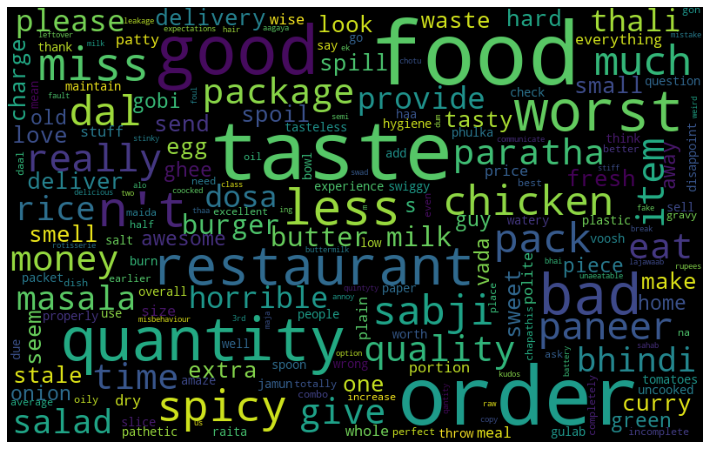

In [26]:
#plot the graph
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [27]:
from textblob import TextBlob

In [28]:
def gettextPolarity(txt):
    return TextBlob(txt).polarity

In [29]:
df['polarity']=df['Feedback'].apply(gettextPolarity)

In [30]:
df.head()

,Order Id,Order Status,Item Name,Item Quantity,Rating,Feedback,polarity
0,10701530888,DELIVERED,Homely Dal Tadka Thali with Sweet,1.0,1 VERY BAD,n't think 's delivery guy fault packet break d...,-0.125
1,106989449753,DELIVERED,Homely Chicken Masala Thali with Sweet,1.0,5 LOVED IT,like quantity food taste .,0.000
2,106762961007,DELIVERED,Homely Bhindi Masala Thali with Sweet,1.0,2 BAD,"bhindi very raw , butter milk foul smell",-0.300
3,106499865637,DELIVERED,Egg Masala,1.0,1 VERY BAD,"one 3rd class restaurant . order egg masala , ...",-0.100
4,106330086944,DELIVERED,"Chicken Masala Rice Bowl, Butter Milk",1.0,2 BAD,chicken bowl two piece chicken,-0.600


In [31]:
def gettextAnalysis(a):
    if a<0:
        return "0"
    else:
        return "1"

In [32]:
df['Label']=df['polarity'].apply(gettextAnalysis)

In [33]:
df.head()

,Order Id,Order Status,Item Name,Item Quantity,Rating,Feedback,polarity,Label
0,10701530888,DELIVERED,Homely Dal Tadka Thali with Sweet,1.0,1 VERY BAD,n't think 's delivery guy fault packet break d...,-0.125,0
1,106989449753,DELIVERED,Homely Chicken Masala Thali with Sweet,1.0,5 LOVED IT,like quantity food taste .,0.000,1
2,106762961007,DELIVERED,Homely Bhindi Masala Thali with Sweet,1.0,2 BAD,"bhindi very raw , butter milk foul smell",-0.300,0
3,106499865637,DELIVERED,Egg Masala,1.0,1 VERY BAD,"one 3rd class restaurant . order egg masala , ...",-0.100,0
4,106330086944,DELIVERED,"Chicken Masala Rice Bowl, Butter Milk",1.0,2 BAD,chicken bowl two piece chicken,-0.600,0


### WordCloud for Feedback containing positive polarity 

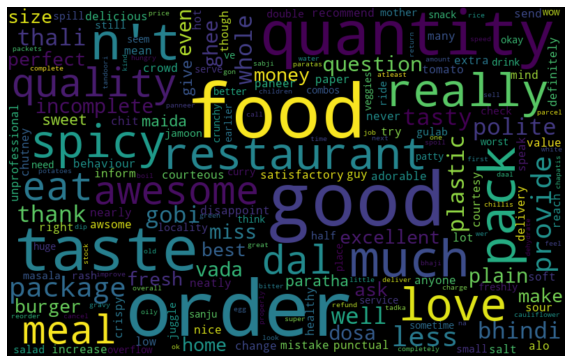

In [34]:
normal_words =' '.join([text for text in df['Feedback'][df['polarity']> 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### WordCloud for Feedback containing negative polarity

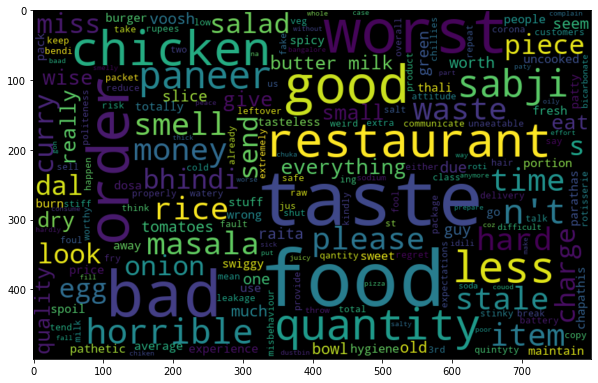

In [35]:
normal_words =' '.join([text for text in df['Feedback'][df['polarity'] < 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.show()

### bar plot between count and score for Feedback column

<AxesSubplot:xlabel='Label', ylabel='count'>

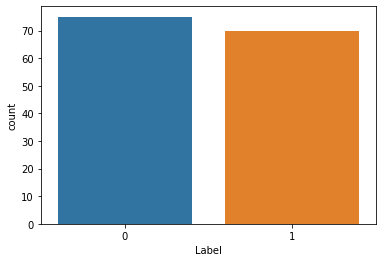

In [36]:
import seaborn as sns
sns.countplot(x='Label', data=df)

#### Here I find that by using TextBlob on Feedback column in data frame it don't give a good classification. So, I apply Textblob on Rating column also.

In [37]:
score=df['Rating'].apply(gettextPolarity)

In [38]:
df['score']=score.apply(gettextAnalysis)

In [39]:
df.head()

,Order Id,Order Status,Item Name,Item Quantity,Rating,Feedback,polarity,Label,score
0,10701530888,DELIVERED,Homely Dal Tadka Thali with Sweet,1.0,1 VERY BAD,n't think 's delivery guy fault packet break d...,-0.125,0,0
1,106989449753,DELIVERED,Homely Chicken Masala Thali with Sweet,1.0,5 LOVED IT,like quantity food taste .,0.000,1,1
2,106762961007,DELIVERED,Homely Bhindi Masala Thali with Sweet,1.0,2 BAD,"bhindi very raw , butter milk foul smell",-0.300,0,0
3,106499865637,DELIVERED,Egg Masala,1.0,1 VERY BAD,"one 3rd class restaurant . order egg masala , ...",-0.100,0,0
4,106330086944,DELIVERED,"Chicken Masala Rice Bowl, Butter Milk",1.0,2 BAD,chicken bowl two piece chicken,-0.600,0,0


### bar plot between count and score for Rating column 

<AxesSubplot:xlabel='score', ylabel='count'>

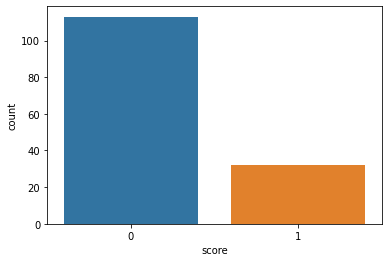

In [40]:
sns.countplot(x='score', data=df)

#### By using Textblob on Feedback column I don't get a good accuracy. So, I designed a filter which has a specified feature of 'AND' logical operator and consider that feature for labeling 

In [41]:
# design a filter which is specified feature of AND
df['final_label']=(df.Label.apply(int) + df.score.apply(int)) > 1

In [42]:
df.head()

,Order Id,Order Status,Item Name,Item Quantity,Rating,Feedback,polarity,Label,score,final_label
0,10701530888,DELIVERED,Homely Dal Tadka Thali with Sweet,1.0,1 VERY BAD,n't think 's delivery guy fault packet break d...,-0.125,0,0,False
1,106989449753,DELIVERED,Homely Chicken Masala Thali with Sweet,1.0,5 LOVED IT,like quantity food taste .,0.000,1,1,True
2,106762961007,DELIVERED,Homely Bhindi Masala Thali with Sweet,1.0,2 BAD,"bhindi very raw , butter milk foul smell",-0.300,0,0,False
3,106499865637,DELIVERED,Egg Masala,1.0,1 VERY BAD,"one 3rd class restaurant . order egg masala , ...",-0.100,0,0,False
4,106330086944,DELIVERED,"Chicken Masala Rice Bowl, Butter Milk",1.0,2 BAD,chicken bowl two piece chicken,-0.600,0,0,False


#### bar plot between count and final_label for new feature formed by AND operation between Rating and Feedback  colum

<AxesSubplot:xlabel='final_label', ylabel='count'>

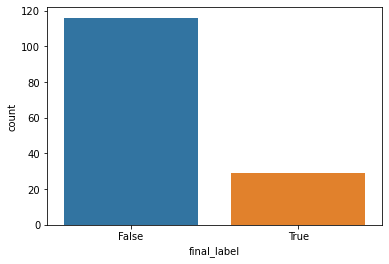

In [43]:
sns.countplot(x='final_label', data=df)

In [44]:
# removing the columns
df=df.drop(['Label', 'score','polarity'], axis = 1)
df.head()

,Order Id,Order Status,Item Name,Item Quantity,Rating,Feedback,final_label
0,10701530888,DELIVERED,Homely Dal Tadka Thali with Sweet,1.0,1 VERY BAD,n't think 's delivery guy fault packet break d...,False
1,106989449753,DELIVERED,Homely Chicken Masala Thali with Sweet,1.0,5 LOVED IT,like quantity food taste .,True
2,106762961007,DELIVERED,Homely Bhindi Masala Thali with Sweet,1.0,2 BAD,"bhindi very raw , butter milk foul smell",False
3,106499865637,DELIVERED,Egg Masala,1.0,1 VERY BAD,"one 3rd class restaurant . order egg masala , ...",False
4,106330086944,DELIVERED,"Chicken Masala Rice Bowl, Butter Milk",1.0,2 BAD,chicken bowl two piece chicken,False


In [45]:
# define a function to convert 'True' and 'Flase' into '0' and '1' in label column
def gettextLabel(b):
    if b==False:
        return "0"
    else:
        return "1"

In [46]:
df['final_label']=df['final_label'].apply(gettextLabel)

In [47]:
df.head()

,Order Id,Order Status,Item Name,Item Quantity,Rating,Feedback,final_label
0,10701530888,DELIVERED,Homely Dal Tadka Thali with Sweet,1.0,1 VERY BAD,n't think 's delivery guy fault packet break d...,0
1,106989449753,DELIVERED,Homely Chicken Masala Thali with Sweet,1.0,5 LOVED IT,like quantity food taste .,1
2,106762961007,DELIVERED,Homely Bhindi Masala Thali with Sweet,1.0,2 BAD,"bhindi very raw , butter milk foul smell",0
3,106499865637,DELIVERED,Egg Masala,1.0,1 VERY BAD,"one 3rd class restaurant . order egg masala , ...",0
4,106330086944,DELIVERED,"Chicken Masala Rice Bowl, Butter Milk",1.0,2 BAD,chicken bowl two piece chicken,0


### Extracting feature from cleam feedback

In [48]:
from sklearn.feature_extraction.text import CountVectorizer
bow=CountVectorizer(max_features=4500)
x=bow.fit_transform(df['Feedback']).toarray()
y=df['final_label']

### Use logistic regression model for classification 

In [49]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [50]:
# fitting the model
lr.fit(x,y)

LogisticRegression()

In [52]:
# find accuracy of model
accuracy=lr.score(x,y)
accuracy

0.9448275862068966

In [53]:
# assign predicted label in sentiment column in dataframe
df['Sentiment']=lr.predict(x)
df.head(20)

,Order Id,Order Status,Item Name,Item Quantity,Rating,Feedback,final_label,Sentiment
0,10701530888,DELIVERED,Homely Dal Tadka Thali with Sweet,1.0,1 VERY BAD,n't think 's delivery guy fault packet break d...,0,0
1,106989449753,DELIVERED,Homely Chicken Masala Thali with Sweet,1.0,5 LOVED IT,like quantity food taste .,1,0
2,106762961007,DELIVERED,Homely Bhindi Masala Thali with Sweet,1.0,2 BAD,"bhindi very raw , butter milk foul smell",0,0
3,106499865637,DELIVERED,Egg Masala,1.0,1 VERY BAD,"one 3rd class restaurant . order egg masala , ...",0,0
4,106330086944,DELIVERED,"Chicken Masala Rice Bowl, Butter Milk",1.0,2 BAD,chicken bowl two piece chicken,0,0
5,105863931119,DELIVERED,"Voosh Paneer Premium Thali with Sweet, Butter ...",1.0,3 AVERAGE,phulka semi-coocked .,0,0
6,105794771832,DELIVERED,Aloo Gobhi,1.0,1 VERY BAD,look like fake copy voosh,0,0
7,107511379634,DELIVERED,Homely Dal Tadka Thali with Sweet,1.0,3 AVERAGE,bhindi sabji much onion tomatoes also rice ver...,0,0
8,107716313565,DELIVERED,Set of Chapatis (4 - Chapatis),3.0,1 VERY BAD,quintyty not good,0,0
9,107680227164,DELIVERED,Homely Aloo Gobhi Thali with Sweet,1.0,2 BAD,no gobi alo gobi much spicy . mean love spicy ...,0,0


In [55]:
from sklearn.metrics import classification_report
report = classification_report(y,df['Sentiment'], output_dict=True)

In [56]:
report

{'0': {'precision': 0.9354838709677419,
  'recall': 1.0,
  'f1-score': 0.9666666666666666,
  'support': 116},
 '1': {'precision': 1.0,
  'recall': 0.7241379310344828,
  'f1-score': 0.8400000000000001,
  'support': 29},
 'accuracy': 0.9448275862068966,
 'macro avg': {'precision': 0.967741935483871,
  'recall': 0.8620689655172413,
  'f1-score': 0.9033333333333333,
  'support': 145},
 'weighted avg': {'precision': 0.9483870967741934,
  'recall': 0.9448275862068966,
  'f1-score': 0.9413333333333334,
  'support': 145}}